In [2]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [3]:
df_DEvideo = pd.read_csv("CSV_Files/DEvideos_v1.csv", index_col= "video_id")
category = pd.read_csv("CSV_Files/category_names.csv")
df_DEvideo.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,One year after the presidential election_ John...
AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


In [4]:
df =pd.merge(df_DEvideo, category)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40840 non-null  object
 1   title                   40840 non-null  object
 2   channel_title           40840 non-null  object
 3   category_id             40840 non-null  int64 
 4   publish_time            40840 non-null  object
 5   tags                    37809 non-null  object
 6   views                   40840 non-null  int64 
 7   likes                   40840 non-null  int64 
 8   dislikes                40840 non-null  int64 
 9   comment_count           40840 non-null  int64 
 10  thumbnail_link          40840 non-null  object
 11  comments_disabled       40840 non-null  bool  
 12  ratings_disabled        40840 non-null  bool  
 13  video_error_or_removed  40840 non-null  bool  
 14  description             39286 non-null  object
 15  ca

In [6]:
df.duplicated().sum()

0

In [7]:
df['publish_time']=pd.to_datetime(df['publish_time'])

In [8]:
df['trending_date']=pd.to_datetime(df['publish_time'],format='%y%m%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trending_date           40840 non-null  datetime64[ns, UTC]
 1   title                   40840 non-null  object             
 2   channel_title           40840 non-null  object             
 3   category_id             40840 non-null  int64              
 4   publish_time            40840 non-null  datetime64[ns, UTC]
 5   tags                    37809 non-null  object             
 6   views                   40840 non-null  int64              
 7   likes                   40840 non-null  int64              
 8   dislikes                40840 non-null  int64              
 9   comment_count           40840 non-null  int64              
 10  thumbnail_link          40840 non-null  object             
 11  comments_disabled       40840 non-null  b

In [45]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06


In [46]:
#dealing with missingsvalues

In [47]:
df_DEvideo.isna().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                      3031
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1554
dtype: int64

In [48]:
df_DEvideo.drop(labels=['tags','description'], axis=1,inplace=True)

C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


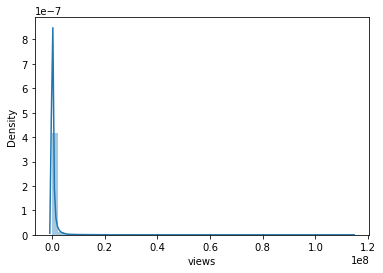

In [52]:
figsize = (20, 15)
sns_plot = sns.distplot(df_DEvideo["views"])

C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\steph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

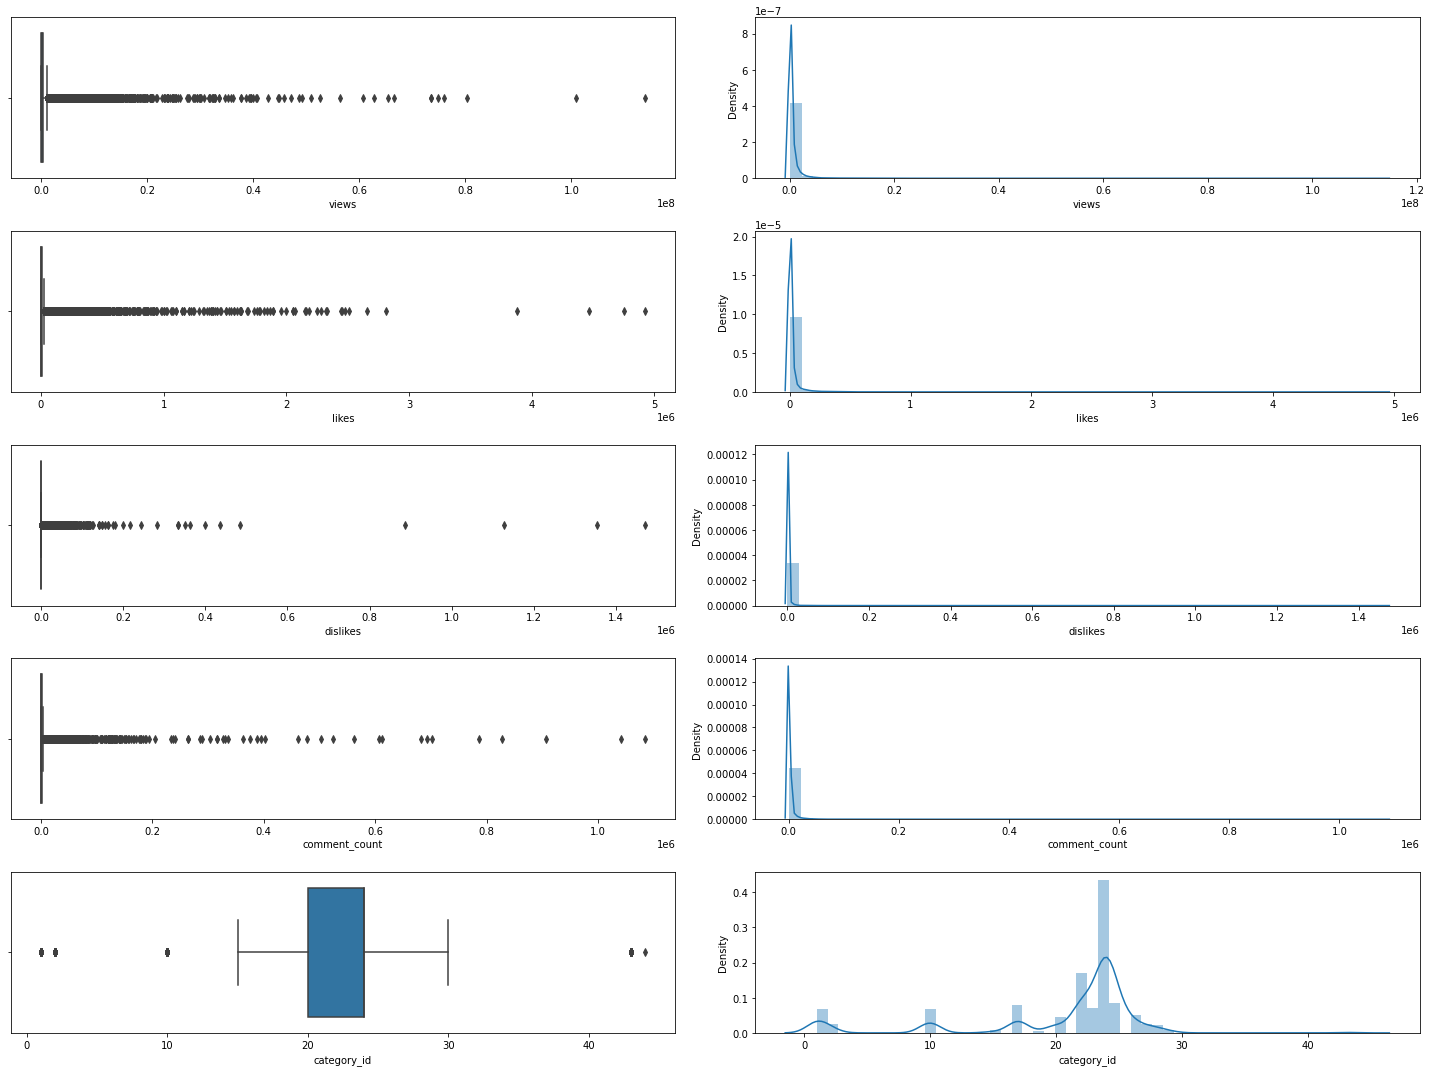

In [51]:
fig, ax = plt.subplots(5, 2, figsize = (20, 15))
sns.boxplot(x= df["views"], ax = ax[0,0])
sns.distplot(df['views'], ax = ax[0,1])
sns.boxplot(x= df["likes"], ax = ax[1,0])
sns.distplot(df['likes'], ax = ax[1,1])
sns.boxplot(x= df["dislikes"], ax = ax[2,0])
sns.distplot(df['dislikes'], ax = ax[2,1])
sns.boxplot(x= df["comment_count"], ax = ax[3,0])
sns.distplot(df['comment_count'], ax = ax[3,1])
sns.boxplot(x= df["category_id"], ax = ax[4,0])
sns.distplot(df['category_id'], ax = ax[4,1])
plt.tight_layout()

In [55]:
df['date'] = df['publish_time'].dt.date.copy()
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_names,date
0,2017-11-13 17:08:49+00:00,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49+00:00,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Entertainment,2017-11-13
1,2017-11-13 07:30:00+00:00,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,One year after the presidential election_ John...,Entertainment,2017-11-13
2,2017-11-12 13:10:36+00:00,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36+00:00,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Entertainment,2017-11-12
3,2017-11-12 16:33:18+00:00,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12 16:33:18+00:00,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,1049,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,Entertainment,2017-11-12
4,2017-11-12 16:09:44+00:00,Die Welt in 30 Jahren - Sommer 2047 - VOLKAN,VOLKAN,24,2017-11-12 16:09:44+00:00,"Welt|""Natur""|""Umwelt""|""Klima""|""Klimawandel""",37877,1839,327,170,https://i.ytimg.com/vi/OKYUtHvgMhc/default.jpg,False,False,False,Über die Zukunft nachzudenken macht Spaß_ oder...,Entertainment,2017-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,2018-06-10 13:00:08+00:00,Street Food in Ghana - GIANT CHOP-BAR LUNCH an...,Mark Wiens,19,2018-06-10 13:00:08+00:00,"Ghana|""Ghana food""|""Ghanaian food""|""fufu""|""ban...",304116,11398,333,1883,https://i.ytimg.com/vi/YvlYjLPgrCE/default.jpg,False,False,False,This was an incredible day of street food in G...,Travel & Events,2018-06-10
40836,2018-06-13 13:00:04+00:00,Village Food in West Africa - BEST FUFU and EX...,Mark Wiens,19,2018-06-13 13:00:04+00:00,"ghana|""fufu""|""West Africa""|""African food""|""Gha...",252328,13557,235,2253,https://i.ytimg.com/vi/GZa2B-knFGw/default.jpg,False,False,False,This was one of the most rewarding experiences...,Travel & Events,2018-06-13
40837,2018-03-08 22:42:50+00:00,Fack Ju Göhte 3 - Trailer,Fack Ju Göhte 3 - Trailer,44,2018-03-08 22:42:50+00:00,NaN,8804,0,0,0,https://i.ytimg.com/vi/riupcv-tf1s/default.jpg,True,False,False,Homo Faber_ Kurvendiskussion_ Asbest in den To...,Trailers,2018-03-08
40838,2018-05-31 13:30:04+00:00,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31 13:30:04+00:00,"full movie|""full punjabi movie""|""golak""|""bugni...",781977,22027,783,1096,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,False,False,False,Rhythm Boyz Entertainment & Hayre Omjee Studio...,Movies,2018-05-31


In [ ]:
plt.figure(1)

In [ ]:
f,axarr = plt.subplots(4,2, figsize=(10,10))
mpgval = df_cars.mpg.values
axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model_year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

C:\Users\steph\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


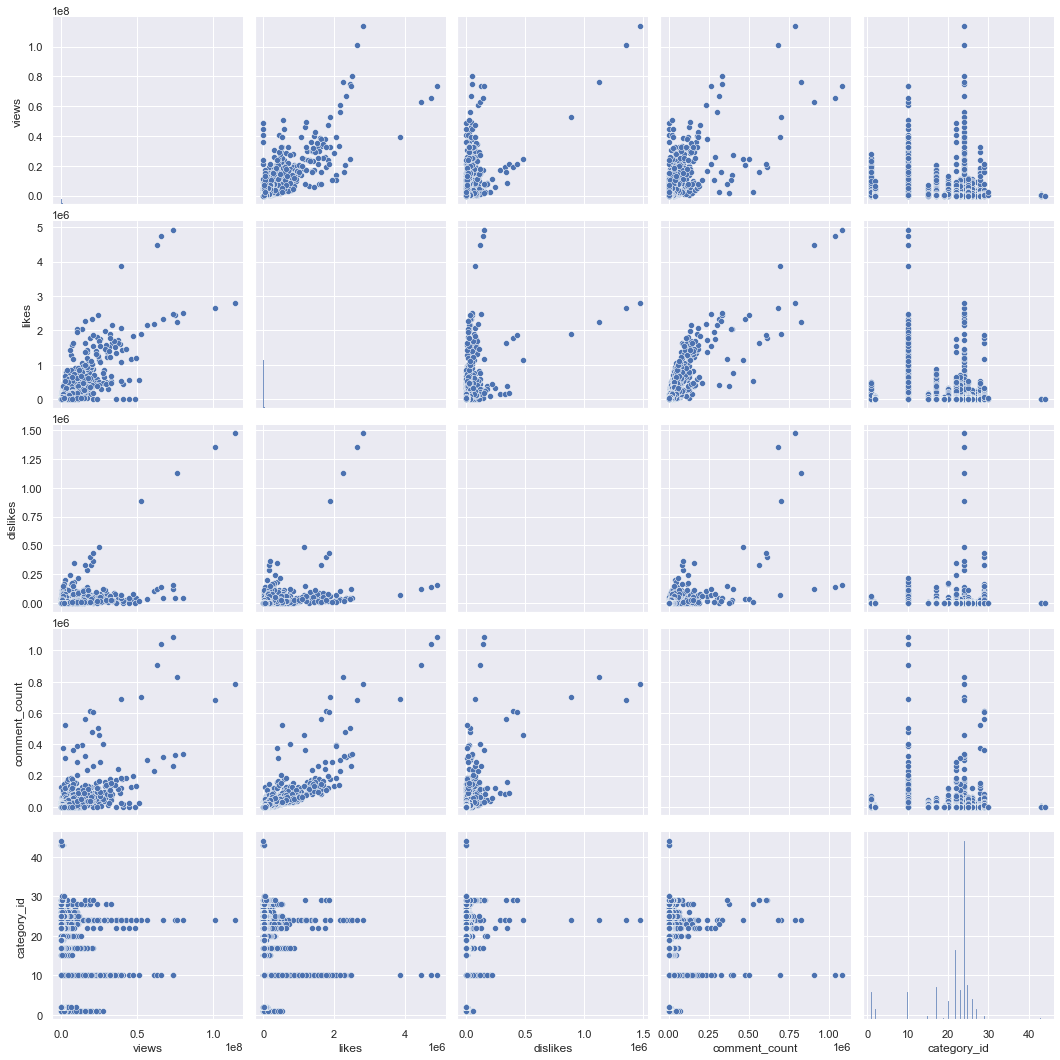

In [53]:
sns.set()
cols = ['views','likes','dislikes', 'comment_count','category_id']
sns.pairplot(df[cols], size = 3)
plt.show()

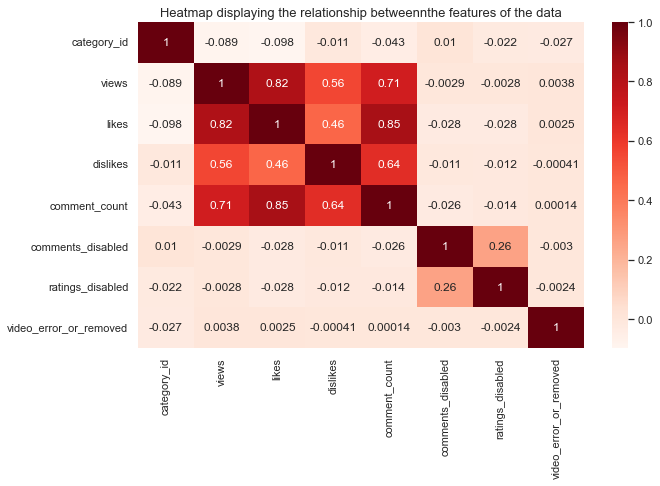

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

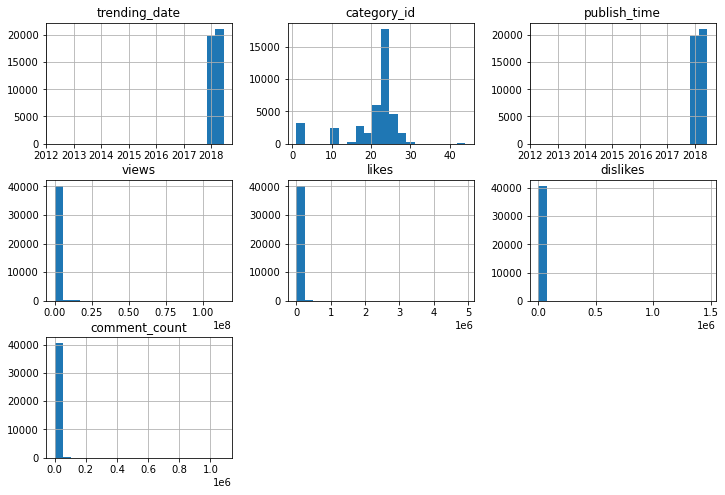

In [10]:
df.hist(figsize=(12,8),bins=20)
plt.show()